**Mount Google Drive to Load and Access Drive data**

In [0]:
# Mount your Google drive 
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np

# To store data
import pandas as pd

# To open zipped files
import bz2

# To use regular expressions
import re

#To load and save data
import pickle

**Showing sample data of each stage of preprocessing to give an idea as to how the data looks like**

In [0]:
# Provided as sample as this is part of preprocessing file. So don't run it
#train_reviews[0:5]

['__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\n',
 "__label__2 The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.\n",
 '__label__2 Amazing!: This s

In [0]:
# Provided as sample as this is now part of preprocessing file. So don't run it
#len(train_reviews), len(test_reviews)

(3600000, 400000)

In [0]:
# Provided as sample as this is part of preprocessing file. So don't run it
# After spliting reviews and labels 

#train_review_sentences[0:5]

['stuning even for the non-gamer: this sound track was beautiful! it paints the senery in your mind so well i would recomend it even to people who hate vid. game music! i have played the game chrono cross but out of all of the games i have ever played it has the best music! it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. it would impress anyone who cares to listen! ^_^',
 "the best soundtrack ever to anything.: i'm reading a lot of reviews saying that this is the best 'game soundtrack' and i figured that i'd write a review to disagree a bit. this in my opinino is yasunori mitsuda's ultimate masterpiece. the music is timeless and i'm been listening to it for years now and its beauty simply refuses to fade.the price tag on this is pretty staggering i must say, but if you are going to buy any cd for this much money, this is the only one that i feel would be worth every penny.",
 'amazing!: this soundtrack is my favorite music of all

In [0]:
# Provided as sample as this is part of preprocessing file. So don't run it
#train_review_sentences[0:5] # - After Preprocessing on Training Set Reviews and removal of stopwords

['stuning even non-gamer: sound track beautiful! paints senery mind well would recomend even people hate vid. game music! played game chrono cross games ever played best music! backs away crude keyboarding takes fresher step grate guitars soulful orchestras. would impress anyone cares listen! ^_^',
 "best soundtrack ever anything.: i'm reading lot reviews saying best 'game soundtrack' figured i'd write review disagree bit. opinino yasunori mitsuda's ultimate masterpiece. music timeless i'm listening years beauty simply refuses fade.the price tag pretty staggering must say, going buy cd much money, one feel would worth every penny.",
 'amazing!: soundtrack favorite music time, hands down. intense sadness "prisoners fate" (which means played game) hope "a distant promise" "girl stole star" important inspiration personally throughout teen years. higher energy tracks like "chrono cross ~ time\'s scar~", "time dreamwatch", "chronomantique" (indefinably remeniscent chrono trigger) absolutely

In [0]:
import os
os.environ['KERAS_BACKEND']='theano' # Or TenserFlow
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import *
from keras.models import Model
from keras.callbacks import ModelCheckpoint

Using Theano backend.


In [0]:
MAX_SEQUENCE_LENGTH = 100
MAX_NB_WORDS = 8000 # This specifies how many top tokens in each review to be stored. Wrongly interpreted as total number of words(token) together in whole dataset
EMBEDDING_DIM = 100 # Dimension which decides length of each feature vector and padding
#VALIDATION_SPLIT = 0.2

In [0]:
# Provided as sample as this is now part of preprocessing file. So don't run it

# Word vectors created from Glove embeddings in preprocessing

#embedding_matrix[107] # For Word Amazon

# These act as weights in NN model

array([-0.17584001, -0.43957001,  1.19869995,  0.19586   ,  0.98308998,
       -0.13039   , -0.17482001,  0.024014  ,  0.22434001, -0.20326   ,
        0.27799001,  0.16906001, -0.084447  , -1.17789996, -0.46180999,
        0.042984  ,  0.73268998,  0.24316999,  0.29288   ,  0.72781998,
        0.37542999,  0.14295   ,  0.74910003,  1.45599997, -0.10302   ,
        0.72324997,  0.21544001, -0.14698   , -0.3705    , -0.72505999,
        0.0596    ,  0.47911   ,  0.058751  , -0.25108999,  0.57620001,
        0.34079999, -0.26969001,  0.20331   ,  0.98045999, -0.51986998,
       -0.27149001,  0.88151997, -0.15381999,  0.11488   , -0.024666  ,
        0.72236001, -0.51524001,  0.19328   ,  0.48061001,  0.50265002,
        0.29479   ,  0.87093002, -0.41517001, -0.18776999, -0.35620001,
       -0.66926998, -0.49553999, -0.67965001,  1.65470004,  0.054571  ,
       -0.042423  ,  0.16688   , -0.005291  , -0.69998002,  0.32888001,
        0.33452001,  0.43709999,  0.091477  ,  1.38689995, -0.71

**
Loading the preprocessed data to feed to ML model **

In [0]:
# Loading the padded train sequence
!cp gdrive/My\ Drive/ADBI-Submission/Preprocessing/Data/Tokenized_Padded_Train_Sequence.pkl .

In [0]:
# Loading test sequences
!cp gdrive/My\ Drive/ADBI-Submission/Preprocessing/Data/Tokenized_Padded_Test_Sequence.pkl .

In [0]:
with open('Tokenized_Padded_Train_Sequence.pkl', 'rb') as f:
    train_reviews_padded = pickle.load(f)

In [0]:
# Loading test sequences
with open('Tokenized_Padded_Test_Sequence.pkl', 'rb') as f:
    test_reviews_padded = pickle.load(f)

In [0]:
train_reviews_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,   15,  520,
       6357,   85,  395,  274, 6043,  351,   13,    7, 1775,   15,   54,
        589,   63,   40,  433,   63, 1812,  506,   51,  433,   20,   40,
       6645,  145, 5067,  334,  775, 2977, 4299,    7, 5165,  111, 2677,
        243], dtype=int32)

In [0]:
# Loading the word_embedding matrix
!cp gdrive/My\ Drive/ADBI-Submission/Preprocessing/Data/WordEmbeddingMappingMatrix.pkl .

In [0]:
with open('WordEmbeddingMappingMatrix.pkl', 'rb') as f:
    embedding_matrix = pickle.load(f)

In [0]:
# Loading the word_index
!cp gdrive/My\ Drive/ADBI-Submission/Preprocessing/Data/Word_Index.pkl .

In [0]:
with open('Word_Index.pkl', 'rb') as f:
    word_index = pickle.load(f)

In [0]:
# Loading the training labels
!cp gdrive/My\ Drive/ADBI-Submission/Preprocessing/Data/train_review_labels.pkl .

In [0]:
# Loading test labels
!cp gdrive/My\ Drive/ADBI-Submission/Preprocessing/Data/test_review_labels.pkl .

In [0]:
with open('train_review_labels.pkl', 'rb') as f:
    train_review_labels = pickle.load(f)

In [0]:
# Opening Test labels
with open('test_review_labels.pkl', 'rb') as f:
    test_review_labels = pickle.load(f)

In [0]:
len(train_review_labels),len(train_reviews_padded),train_reviews_padded.shape

(3600000, 3600000, (3600000, 100))

In [0]:
len(test_review_labels),len(test_reviews_padded),test_reviews_padded.shape

(400000, 400000, (400000, 100))

**CNN - Model Defination, Training, Validation **

In [0]:
# Defining the Convolutional NN model
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,trainable=True)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

net = Dropout(0.2)(embedded_sequences)
net = BatchNormalization()(net)

net = Conv1D(32, 7, padding='same', activation='relu')(net)
net = BatchNormalization()(net)
net = Conv1D(32, 3, padding='same', activation='relu')(net)
net = BatchNormalization()(net)
net = Conv1D(32, 3, padding='same', activation='relu')(net)
net = BatchNormalization()(net)
net = Conv1D(32, 3, padding='same', activation='relu')(net)
net = BatchNormalization()(net)

net = Conv1D(2, 1)(net)
net = GlobalAveragePooling1D()(net)

output = Activation('softmax')(net)

model = Model(inputs = sequence_input, outputs = output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

# Keeping a checkpoint to store only the model which gives best output validation accuracy
chkpt=ModelCheckpoint('cnn_model.h5',monitor='val_acc',verbose=1,save_best_only=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 100)          99649800  
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100)          400       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 32)           22432     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100, 32)           128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 100, 32)           3104      
__________

In [0]:
# choosing a subset of data to train and see how model performs
x_train = np.array(train_reviews_padded)[:200000]

In [0]:
x_train = np.array(train_reviews_padded)

In [0]:
train_labels = [[1,0] if x == 0 else [0,1] for x in train_review_labels[1:200001]] 

In [0]:
train_labels = [[1,0] if x == 0 else [0,1] for x in train_review_labels] 

In [0]:
train_labels[0]
y_train = np.array(train_labels)

In [0]:
len(x_train),len(y_train)

(3600000, 3600000)

**Understanding importance of pre-trained word embeddings**

In [0]:
# Model With Word embeddings and trainable  = true

history = model.fit(x_train, y_train, batch_size=2048, epochs=1, validation_split=0.1)
#model.save('my_model.h5')

Train on 180000 samples, validate on 20000 samples
Epoch 1/1
180000/180000 [==============================] - 857s 5ms/step - loss: 0.6706 - acc: 0.5906 - val_loss: 0.6893 - val_acc: 0.5321


In [0]:
# Without using word embeddings in the model

history = model.fit(x_train, y_train, batch_size=2048, epochs=1, validation_split=0.1)
#model.save('my_model.h5')

Train on 180000 samples, validate on 20000 samples
Epoch 1/1
180000/180000 [==============================] - 970s 5ms/step - loss: 0.6645 - acc: 0.6019 - val_loss: 0.7030 - val_acc: 0.5006


In [0]:
# With word embeddings but trainable = False - So weights won't be trained during training phase

history = model.fit(x_train, y_train, batch_size=2048, epochs=1, validation_split=0.1)
#model.save('my_model.h5')

Train on 180000 samples, validate on 20000 samples
Epoch 1/1
180000/180000 [==============================] - 846s 5ms/step - loss: 0.6681 - acc: 0.5965 - val_loss: 0.6935 - val_acc: 0.5018


**On this small dataset with only 1 iteration, we see that there is approx 3 % increase in validation accuracy by using pre-trained word-embeddings. Also when using trainable = false, they perform approximately equally to the no word embeddings version. So using word_embeddings with trainable = true is really benificial in our usecase.**

In [0]:
# Shuffling the data set to get a mix of reviews from the entire set.

from sklearn.utils import shuffle
x_train, y_train = shuffle(train_reviews_padded, train_review_labels)

In [0]:
len(x_train),len(y_train)

(600000, 600000)

**We got 92% accuracy by training on the whole data set but just 1 epoch. Takes several hours for a single epoch. So din't try to run for more epochs. 
**

In [54]:
#Now Lets try a subset of data(0.6 million) and increase the number of epochs

x_train = np.array(x_train[:600000])
train_labels = [[1,0] if x == 0 else [0,1] for x in y_train[:600000]] 
y_train_6 = np.array(train_labels)
len(x_train),len(y_train_6)

(600000, 600000)

In [55]:
# Also Lets try a subset of data(1 million) and increase the number of epochs

x_train = np.array(x_train[:1000000])
train_labels = [[1,0] if x == 0 else [0,1] for x in y_train[:1000000]] 
y_train = np.array(train_labels)
len(x_train),len(y_train)

(600000, 1000000)

In [56]:
y_train[0]

array([0, 1])

**Do not run this code as it takes around 2 hours to train the model. **

**Code for Loading the saved model and evauating on test data is given below**

In [0]:
# Now let's train the model on the 0.6 million reviews. 
# We will run for 5 epochs and monitor the training and validation accuracy and loss.

model_history = model.fit(x_train, y_train_6, batch_size=1024, epochs=5, validation_split=0.1,callbacks=[chkpt])
model.save('cnn_model.h5')

Train on 540000 samples, validate on 60000 samples
Epoch 1/5
540000/540000 [==============================] - 2534s 5ms/step - loss: 0.3591 - acc: 0.8420 - val_loss: 0.3271 - val_acc: 0.8566
Epoch 2/5
540000/540000 [==============================] - 2536s 5ms/step - loss: 0.3171 - acc: 0.8636 - val_loss: 0.3924 - val_acc: 0.8238
Epoch 3/5
540000/540000 [==============================] - 2470s 5ms/step - loss: 0.3039 - acc: 0.8704 - val_loss: 0.2943 - val_acc: 0.8766
Epoch 4/5
540000/540000 [==============================] - 2405s 4ms/step - loss: 0.2974 - acc: 0.8730 - val_loss: 0.3767 - val_acc: 0.8364
Epoch 5/5
540000/540000 [==============================] - 2482s 5ms/step - loss: 0.2918 - acc: 0.8759 - val_loss: 0.3104 - val_acc: 0.8704


**Do not run this code as it takes around 4 hours to train the model. Code for Loading the saved model and evauating on test data is given below**

In [0]:
# Now let's train the model on the 1 million reviews. We will run for 5 epochs and monitor the training and validation accuracy and loss.
model_history = model.fit(x_train, y_train, batch_size=1024, epochs=5, validation_split=0.1,callbacks=[chkpt])
model.save('cnn_model_new.h5')

Train on 900000 samples, validate on 100000 samples
Epoch 1/5
900000/900000 [==============================] - 5139s 6ms/step - loss: 0.2857 - acc: 0.8801 - val_loss: 0.3383 - val_acc: 0.8525

Epoch 00001: val_acc improved from -inf to 0.85249, saving model to cnn_model.h5
Epoch 2/5
900000/900000 [==============================] - 5079s 6ms/step - loss: 0.2316 - acc: 0.9068 - val_loss: 0.2286 - val_acc: 0.9088

Epoch 00002: val_acc improved from 0.85249 to 0.90877, saving model to cnn_model.h5
Epoch 3/5
900000/900000 [==============================] - 5118s 6ms/step - loss: 0.2175 - acc: 0.9133 - val_loss: 0.2190 - val_acc: 0.9145

Epoch 00003: val_acc improved from 0.90877 to 0.91446, saving model to cnn_model.h5
Epoch 4/5
900000/900000 [==============================] - 5308s 6ms/step - loss: 0.2083 - acc: 0.9170 - val_loss: 0.2131 - val_acc: 0.9167

Epoch 00004: val_acc improved from 0.91446 to 0.91670, saving model to cnn_model.h5
Epoch 5/5
900000/900000 [==========================

**Training on 1 million reviews with validation split of 0.1 over 5 epochs yeilds much better results. Also there is no overfitting so there is still scope of increasing model accuracy by increasing number of epochs or increasing the size of training set**

** Saving the results and model architecture to drive so that it can be loaded and reused later**

** Only run this if the model is trained again**

In [0]:
# Saving the model so that it can be loaded easily again
model.save_weights('cnn_model_weights.h5')

# Save the model architecture
with open('cnn_model_architecture.json', 'w') as f:
    f.write(model.to_json())

In [0]:
# Persisting model weights
!cp cnn_model_weights.h5 gdrive/My\ Drive/ADBI-Submission/CNN/Result/

In [0]:
# Persisting model architecture
!cp cnn_model_architecture.json gdrive/My\ Drive/ADBI-Submission/CNN/Result/

In [0]:
# Persisting the entire model to drive
# cnn_model_new - latest model trained on 1 million reviews
# cnn_model - Old model trained on 0.6 million reviews

# Load this again using load_model function of keras.
!cp cnn_model_new.h5 gdrive/My\ Drive/ADBI-Submission/CNN/Result/

**Plotting Accuracy and Loss Curves**

** Do not run it as we will not be trainining the model again. So no model history is currently generated**


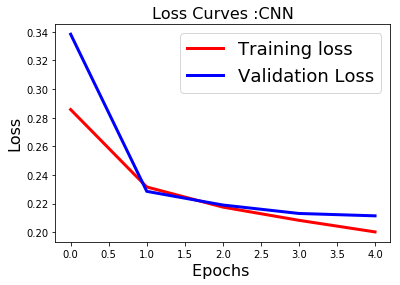

In [0]:
# Do not run it as we will not be trainining the model again. So no model history is currently generated

import matplotlib.pyplot as plt
plt.switch_backend('agg')
%matplotlib inline

# Loss Curves

fig1 = plt.figure()
plt.plot(model_history.history['loss'],'r',linewidth=3.0)
plt.plot(model_history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :CNN',fontsize=16)
fig1.savefig('loss_cnn.png')
plt.show()

**Do not run it as we will not be tranining the model again. So no model history is currently generated**


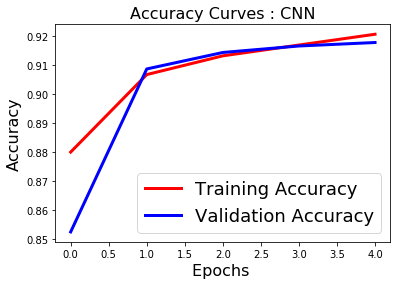

In [0]:
# Do not run it as we will not be tranining the model again. So no model history is currently generated

# Accuracy Curves
fig2=plt.figure()
plt.plot(model_history.history['acc'],'r',linewidth=3.0)
plt.plot(model_history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : CNN',fontsize=16)
fig2.savefig('accuracy_cnn.png')
plt.show()



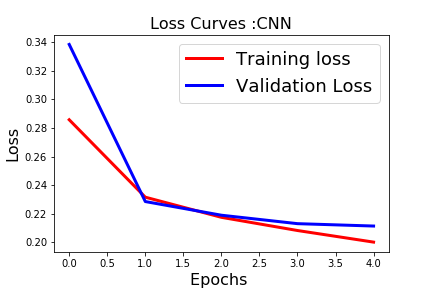

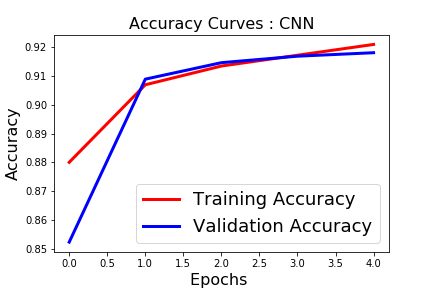

In [57]:
# Run this code to load the accuracy and loss plots saved during training phase for 1 million data records and 5 epochs

!cp gdrive/My\ Drive/ADBI-Submission/CNN/Result/loss_cnn.png .
!cp gdrive/My\ Drive/ADBI-Submission/CNN/Result/accuracy_cnn.png .

from PIL import Image
display(Image.open('loss_cnn.png'))
display(Image.open('accuracy_cnn.png'))


**Loading the trained model and evaluating on Test Data**

In [0]:
!cp gdrive/My\ Drive/ADBI-Submission/CNN/Result/cnn_model_architecture.json .
!cp gdrive/My\ Drive/ADBI-Submission/CNN/Result/cnn_model_weights.h5 .

In [0]:
# Loading model and weights again from drive
from keras.models import model_from_json

# Model reconstruction from JSON file
with open('cnn_model_architecture.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('cnn_model_weights.h5')

In [61]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 100, 100)          99649800  
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 100, 100)          400       
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 100, 32)           22432     
_________________________________________________________________
batch_normalization_27 (Batc (None, 100, 32)           128       
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 100, 32)           3104      
__________

In [0]:
#Preparing test data
from sklearn.utils import shuffle
x_test, y_test = shuffle(test_reviews_padded, test_review_labels)

In [63]:
y_test[0]

0

In [64]:
x_test = np.array(x_test)
test_labels = [[1,0] if y == 0 else [0,1] for y in y_test] 
y_test = np.array(test_labels)
len(x_test),len(y_test)

(400000, 400000)

In [65]:
y_test[0]

array([1, 0])

Evaluating on test data

In [0]:
# Takes around 10 minutes to run on 0.4 million records

# Evaluating on test data - model trained on 0.6 million reviews for 5 epochs - Accuracy = 87%
# Evaluating on test data - model trained on 1 million reviews for 5 epochs - Accuracy = 92%
model.evaluate (x_test, y_test)

400000/400000 [==============================] - 905s 2ms/step


[0.21080564504630864, 0.91712]

In [0]:
# Checking to see if results are reproducible

model.evaluate (x_test, y_test)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


400000/400000 [==============================] - 858s 2ms/step


[0.21080564505904914, 0.91712]

**Accuracy of 92% on test data as well which confirms there is no overfitting**

Plotting Model Architecture

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='cnn_model_diagram_new.png',show_shapes=True, show_layer_names=True)

In [0]:
!cp cnn_model_diagram_new.png gdrive/My\ Drive/ADBI-Submission/CNN/Result/

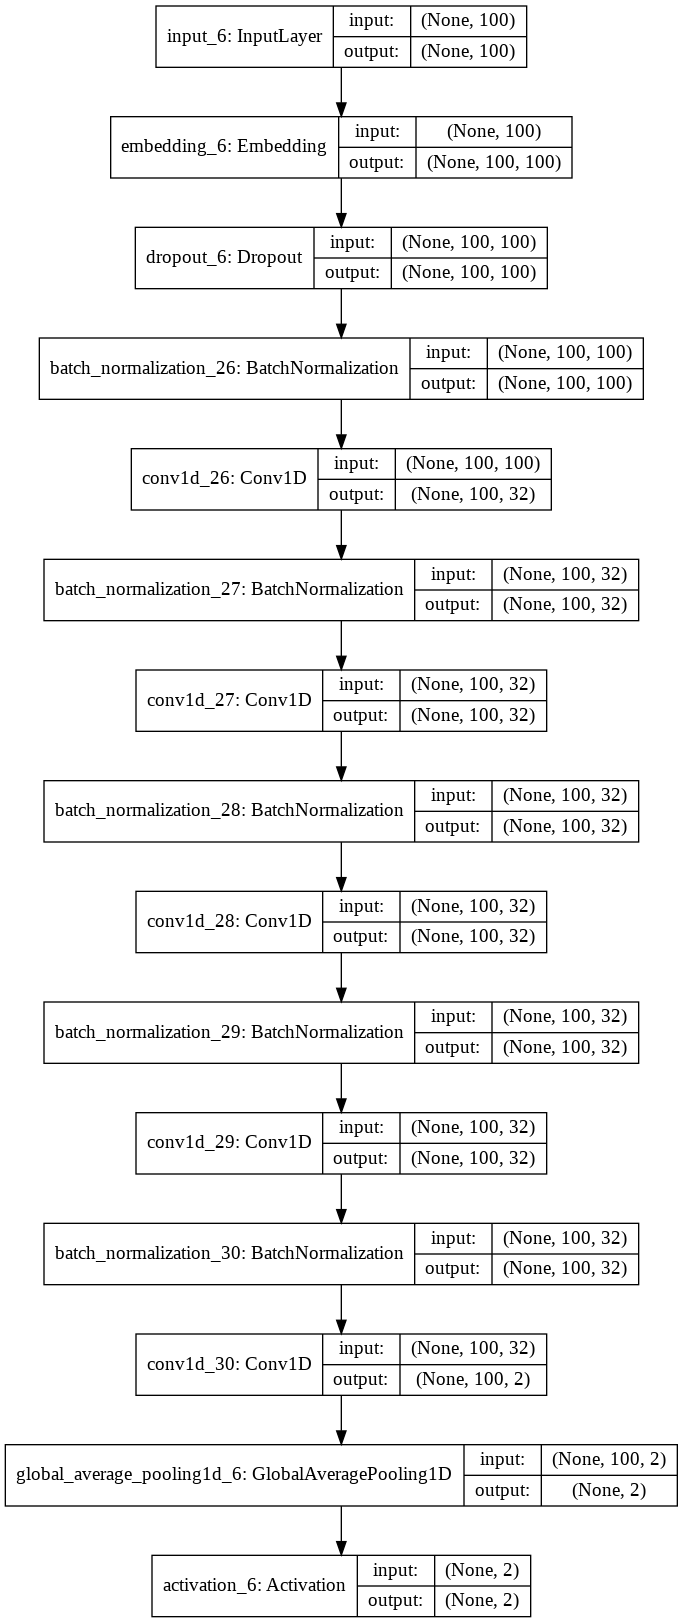

In [67]:
!cp gdrive/My\ Drive/ADBI-Submission/CNN/Result/cnn_model_diagram_new.png .
# Displaying visual graph of the CNN Model
from PIL import Image
display(Image.open('cnn_model_diagram_new.png'))